# Air Passenger Satisfaction - EDA and Prediction

**Author** <br>
Chris Bacani <br>
Data Scientist Apprentice at IBM, Data Science & AI Elite<br>
cbacani@ibm.com

**Data Source**<br>
<a href = "https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction">Kaggle.com - Airline Passenger Satisfaction</a>

### Dependency Imports and Data Import

#### Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Data Imports

In [2]:
!ls '/project_data/data_asset'

test.csv  test_encode.csv  train.csv  train_encode.csv


In [3]:
# Import train and test split datasets
train = pd.read_csv('/project_data/data_asset/train.csv')
test = pd.read_csv('/project_data/data_asset/test.csv')

In [4]:
train.shape

(103904, 25)

In [5]:
test.shape

(25976, 25)

In [6]:
# Previewing training dataset
train.head(15)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [7]:
# Previewing test dataset
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [8]:
print(train.isna().values.sum())

310


#### Data Cleaning Function

In [9]:
def clean_data(df):
    # Dropping the unnecessary columns
    df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
    
    # Lower casing all column names
    df.columns = df.columns.str.lower()

    # Replacing space characters with underscores
    special_chars = "/ -" 
    for special_char in special_chars:
        df.columns = [col.replace(special_char, '_') for col in df.columns]
    
    # Simplifying answers, will also help when one-hot encoding categorical columns
    cat_cols = ['gender', 'customer_type', 'class', 'type_of_travel', 'satisfaction']

    for column in cat_cols:
        df[column] = df[column].str.lower() 
        
    # There are null values in the 'Arrival Delay Time' column, since we can't safely presume that these values equate to no delay, we'll fill with the mean of the column
    df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].mean(), inplace = True)
    df.round({'arrival_delay_in_minutes' : 1})
    
    # Dropping '0' value rows from DataFrame, they don't serve any purpose, and they will help us simplify our data
    rank_list = ["inflight_wifi_service", "departure_arrival_time_convenient", "ease_of_online_booking", "gate_location",
                "food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment", "on_board_service",
                "leg_room_service", "baggage_handling", "checkin_service", "inflight_service", "cleanliness"]

    for col in rank_list:
        df.drop(df.loc[df[col]==0].index, inplace=True)

    # Converting 'satisfaction' column to a binary column
    df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
    
    cleaned_df = df
    
    return cleaned_df

##### Cleaned Dataset

In [10]:
# The cleaned dataframe that we will use for training
train_cleaned = clean_data(train)

In [11]:
train_cleaned.head(15)

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,male,loyal customer,13,personal travel,eco plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,male,disloyal customer,25,business travel,business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,female,loyal customer,26,business travel,business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,female,loyal customer,25,business travel,business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,male,loyal customer,61,business travel,business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,female,loyal customer,26,personal travel,eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,male,loyal customer,47,personal travel,eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0
7,female,loyal customer,52,business travel,business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,1
8,female,loyal customer,41,business travel,business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,0
9,male,disloyal customer,20,business travel,eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,0


### Exploratory Data Analysis

#### Exploration of Ranking Columns

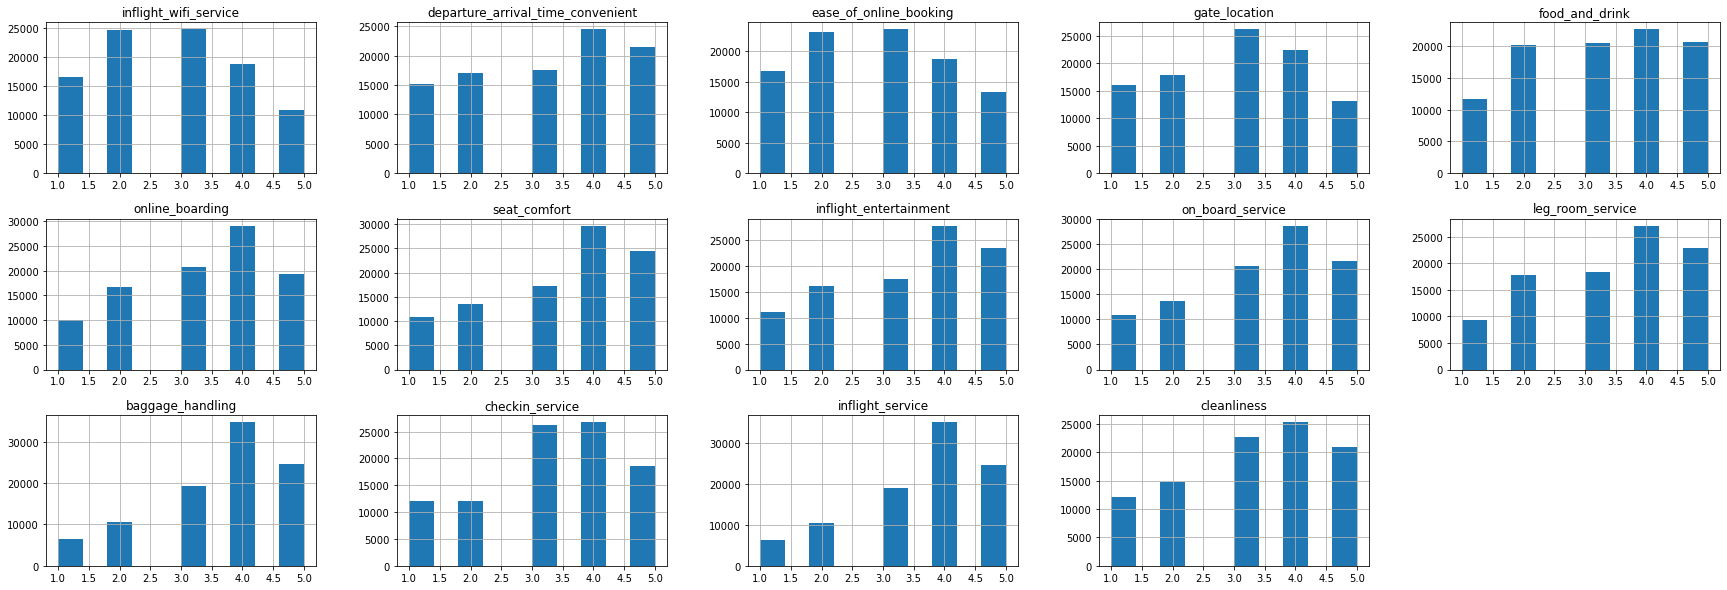

In [12]:
from matplotlib.pyplot import figure

rank_list = ["inflight_wifi_service", "departure_arrival_time_convenient", "ease_of_online_booking", "gate_location",
            "food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment", "on_board_service",
            "leg_room_service", "baggage_handling", "checkin_service", "inflight_service", "cleanliness"]

train_cleaned.hist(column = rank_list, layout=(3,5), label='x', figsize = (30,10));

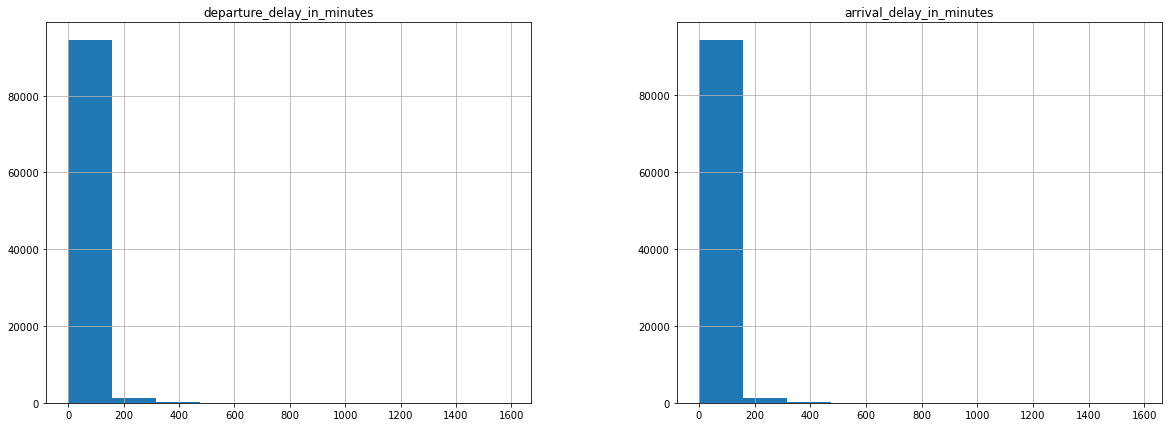

In [13]:
train.hist(column = ['departure_delay_in_minutes', 'arrival_delay_in_minutes'], layout=(1,2), label='x', figsize = (20,7));

#### Checking class imbalance in satisfaction (prediction) column

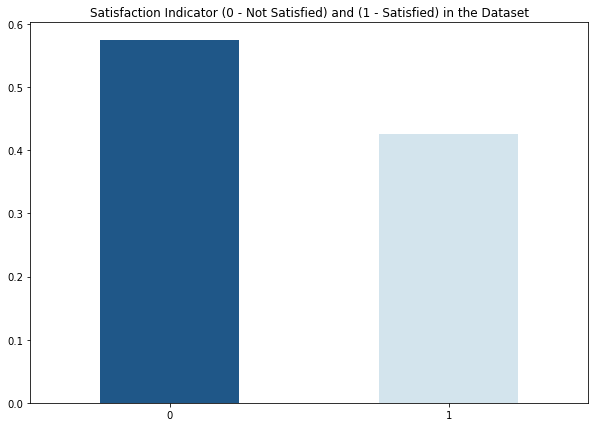

In [14]:
fig = plt.figure(figsize = (10,7))
train_cleaned.satisfaction.value_counts(normalize = True).plot(kind='bar', color = ['#06457b','#CFE2EC'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0 - Not Satisfied) and (1 - Satisfied) in the Dataset')
plt.show()

**Observations about satisfaction** : The prediction columns are relatively balanced, at a ratio of 55:45 not satisfied to satisfied. I would say that the data does not required any treatment or resampling.

#### Comparing satisfaction against customer type and gender

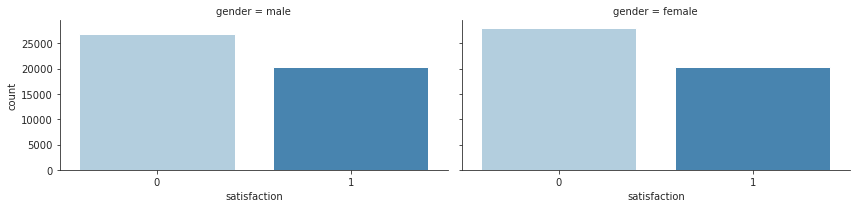

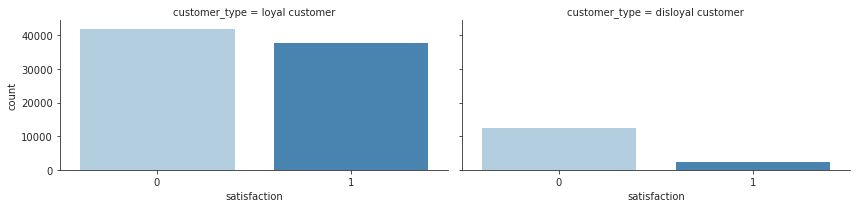

In [15]:
# Catplot to compare age and customer type to satisfaction
with sns.axes_style(style = 'ticks'):
    g = sns.catplot(x = "satisfaction", col = "gender", col_wrap = 2, data = train, kind = "count", height = 3, aspect = 2.0, palette = 'Blues'); 
    g = sns.catplot(x = "satisfaction", col = "customer_type", col_wrap = 2, data = train, kind = "count", height = 3, aspect = 2.0, palette = 'Blues')

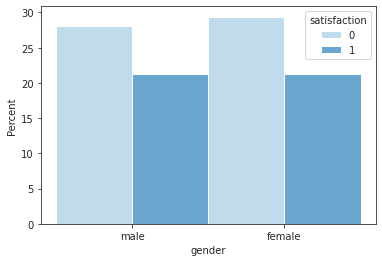

In [16]:
with sns.axes_style(style = 'ticks'):
    d = sns.histplot(x = "gender",  hue= 'satisfaction', data = train,  palette = 'Blues', stat = 'percent', multiple="dodge")

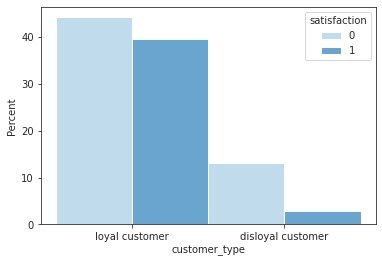

In [17]:
with sns.axes_style(style = 'ticks'):
    d = sns.histplot(x = "customer_type",  hue= 'satisfaction', data = train,  palette = 'Blues', stat = 'percent', multiple="dodge")

**Observations about gender** : The dataset appears to be fairly balanced between both male and female. The genders are similarly represented in terms of proportion of satisfied flier to dissatisfied or neutral flier. <br>
**Observations about customer type** : The dataset is more heavily represented by loyalty fliers. There are about three times as many loyalty fliers as there are nonregular fliers. Satisfaction seems to be represented proportionally amongst loyalty and nonregular fliers - with more customers claiming they were overall dissatisfied with their service. 

#### Comparing satisfaction against age

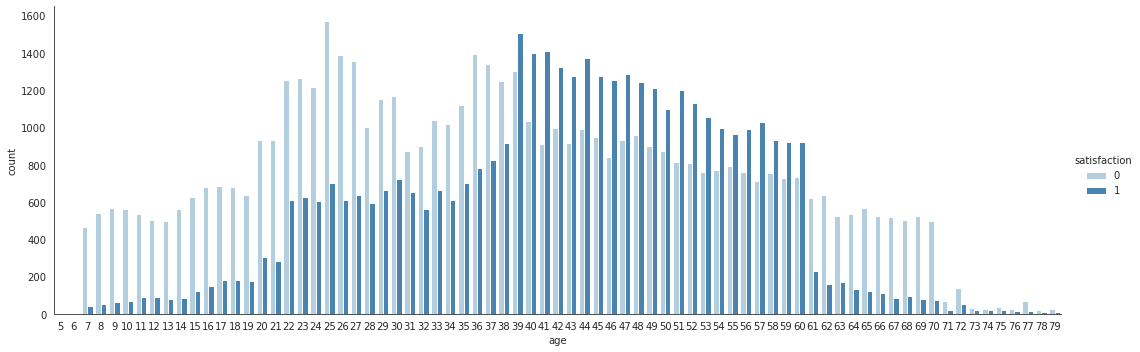

In [18]:
# Countplot comparing age to satisfaction
with sns.axes_style('white'):
    g = sns.catplot(x = 'age', data = train_cleaned, aspect = 3.0, kind = 'count', hue = 'satisfaction', order = range(5, 80), palette = 'Blues')

**Observations about age** : A majority of customers across all age groups are generally more dissatisfied with their travel than are satisfied. There are buckets where we can see trends in customer satisfaction vs. dissatisfaction/indifference. Customers between ages 7 and 38 and customers between ages 61 and 79 said that they were dissatisfied with their travel experience, while customers between the ages of 39 and 60 reported that they were more satisfied with their travel service.

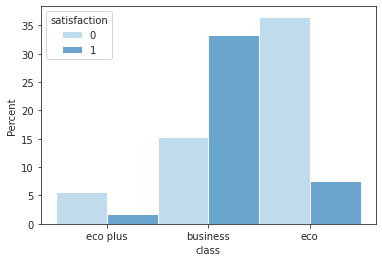

In [19]:
with sns.axes_style(style = 'ticks'):
    d = sns.histplot(x = "class",  hue= 'satisfaction', data = train,  palette = 'Blues', stat = 'percent', multiple="dodge")

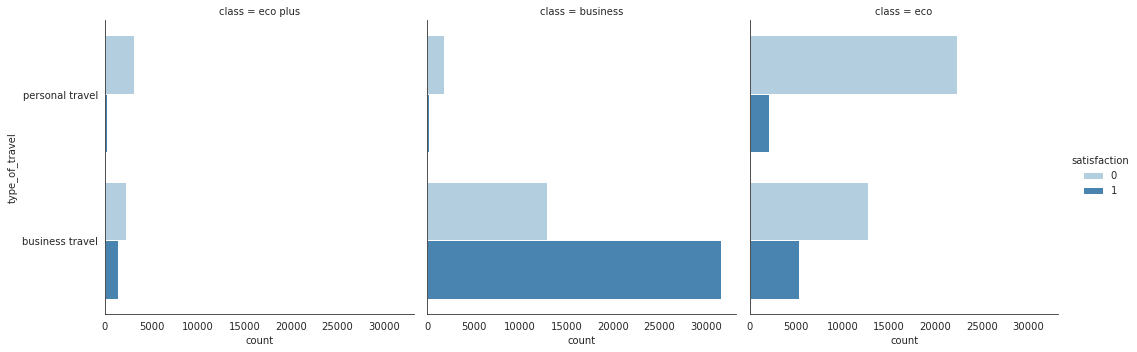

In [20]:
with sns.axes_style('white'):
    g = sns.catplot(y = 'type_of_travel', hue = 'satisfaction', col = 'class', data = train_cleaned, kind = 'count', height = 5, aspect = 1, palette = 'Blues', )

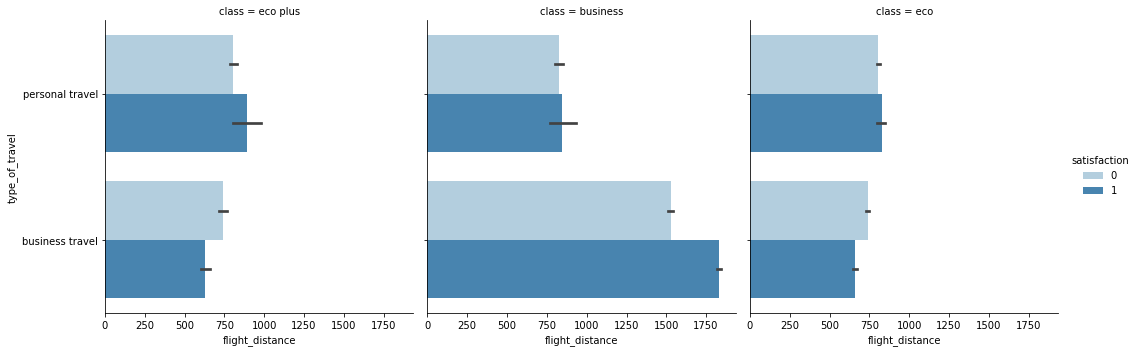

In [21]:
    g = sns.catplot(x = 'flight_distance', y = 'type_of_travel', hue = 'satisfaction', col = 'class', data = train_cleaned, kind = 'bar', height = 5, aspect = 1, palette = 'Blues')

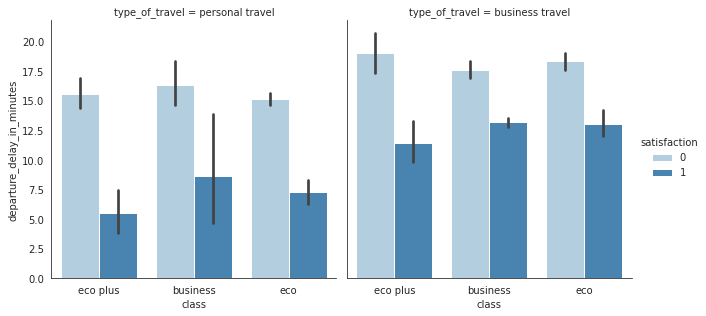

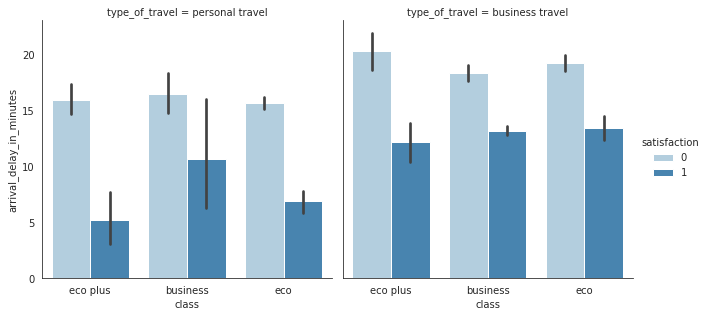

In [22]:
with sns.axes_style('white'):
    g = sns.catplot(x = 'class', y = 'departure_delay_in_minutes', hue = 'satisfaction', col = 'type_of_travel', data = train_cleaned, kind = 'bar', height = 4.5, aspect = 1, palette = 'Blues')
    g = sns.catplot(x = 'class', y = 'arrival_delay_in_minutes', hue = 'satisfaction', col = 'type_of_travel', data = train_cleaned, kind = 'bar', height = 4.5, aspect = 1, palette = 'Blues')

### Categorical Column Encoding

In [23]:
def encode_data(df):
    df.customer_type.replace({'loyal customer': 1, 'disloyal customer': 0}, inplace = True)
    df.type_of_travel.replace({'personal travel': 1, 'business travel': 0}, inplace = True)
    df.gender.replace({'male': 1, 'female' : 0}, inplace = True)
    df['class'].replace({'eco': 'economy', 'eco plus': 'premium economy'}, inplace = True)  
    
    encoded_df = pd.get_dummies(df, columns = ['class'])
    
    return encoded_df

In [24]:
train_encoded = encode_data(train_cleaned)

In [25]:
train_encoded.head()

,gender,customer_type,age,type_of_travel,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,class_business,class_economy,class_premium economy
0,1,1,13,1,460,3,4,3,1,5,...,4,4,5,5,25,18.0,0,0,0,1
1,1,0,25,0,235,3,2,3,3,1,...,3,1,4,1,1,6.0,0,1,0,0
2,0,1,26,0,1142,2,2,2,2,5,...,4,4,4,5,0,0.0,1,1,0,0
3,0,1,25,0,562,2,5,5,5,2,...,3,1,4,2,11,9.0,0,1,0,0
4,1,1,61,0,214,3,3,3,3,4,...,4,3,3,3,0,0.0,1,1,0,0


In [26]:
train_encoded.online_boarding.value_counts()

4    29087
3    20715
5    19350
2    16602
1     9950
Name: online_boarding, dtype: int64

#### Applying cleaning and encodings to test dataset

In [27]:
test_cleaned = clean_data(test)
test_encoded = encode_data(test_cleaned)

In [28]:
test_encoded.head()

,gender,customer_type,age,type_of_travel,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,class_business,class_economy,class_premium economy
0,0,1,52,0,160,5,4,3,4,3,...,5,2,5,5,50,44.0,1,0,1,0
1,0,1,36,0,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,1,1,0,0
4,0,1,49,0,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,1,0,1,0
5,1,1,16,0,311,3,3,3,3,5,...,1,1,2,5,0,0.0,1,0,1,0
6,0,1,77,0,3987,5,5,5,5,3,...,5,4,5,3,0,0.0,1,1,0,0


### Feature Correlation and Selection

<AxesSubplot:xlabel='inflight_entertainment', ylabel='satisfaction'>

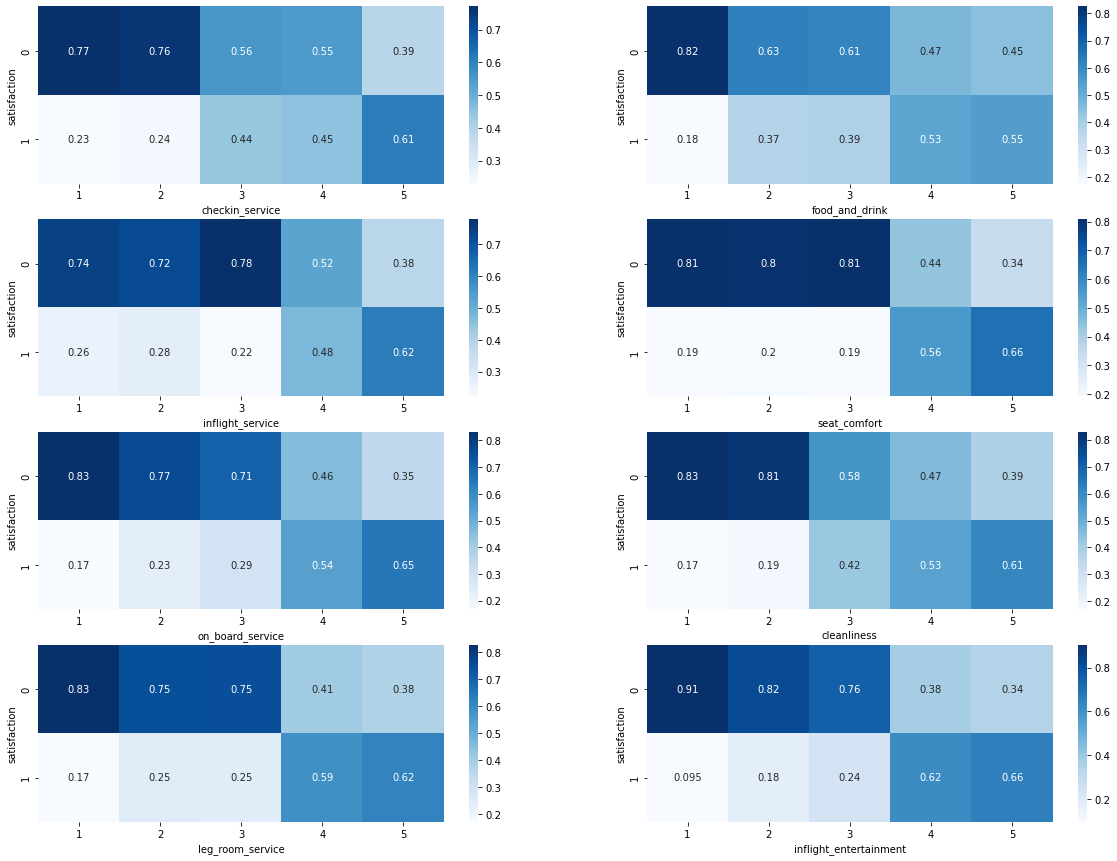

In [29]:
# Correlative heatmap
fig, axarr = plt.subplots(4, 2, figsize=(20, 15))

table1 = pd.crosstab(train_cleaned['satisfaction'], train_cleaned['checkin_service'], normalize='columns')
sns.heatmap(table1, cmap='Blues', ax = axarr[0][0], annot = True)
table2 = pd.crosstab(train_cleaned['satisfaction'], train_cleaned['inflight_service'], normalize = 'columns')
sns.heatmap(table2, cmap='Blues', ax = axarr[1][0], annot = True)
table3 = pd.crosstab(train_cleaned['satisfaction'], train_cleaned['on_board_service'], normalize = 'columns')
sns.heatmap(table3, cmap='Blues', ax = axarr[2][0], annot = True)
table4 = pd.crosstab(train_cleaned['satisfaction'], train_cleaned['leg_room_service'], normalize = 'columns')
sns.heatmap(table4, cmap='Blues', ax = axarr[3][0], annot = True)
table5 = pd.crosstab(train_cleaned['satisfaction'], train_cleaned['food_and_drink'], normalize = 'columns')
sns.heatmap(table5, cmap='Blues', ax = axarr[0][1], annot = True)
table6 = pd.crosstab(train_cleaned['satisfaction'], train_cleaned['seat_comfort'], normalize = 'columns')
sns.heatmap(table6, cmap='Blues', ax = axarr[1][1], annot = True)
table7 = pd.crosstab(train_cleaned['satisfaction'], train_cleaned['cleanliness'], normalize = 'columns')
sns.heatmap(table7, cmap='Blues', ax = axarr[2][1], annot = True)
table8 = pd.crosstab(train_cleaned['satisfaction'], train_cleaned['inflight_entertainment'], normalize = 'columns')
sns.heatmap(table8, cmap='Blues', ax = axarr[3][1], annot = True)

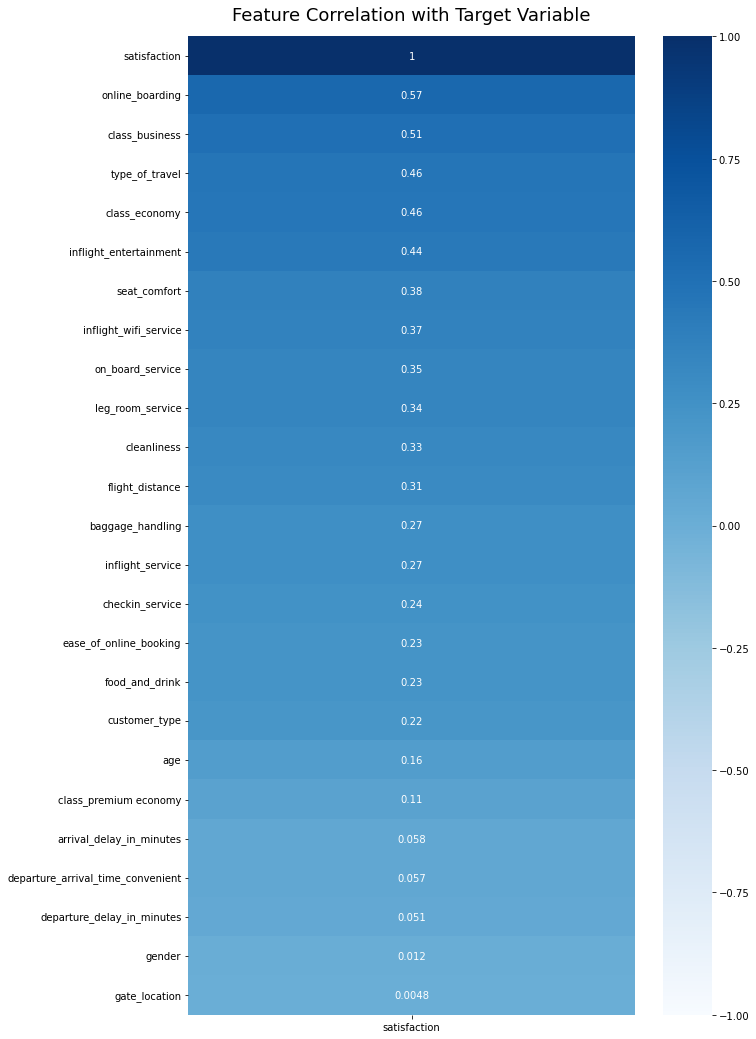

In [30]:
train_corr = train_encoded.corr()[['satisfaction']]
train_corr = np.abs(train_corr)

plt.figure(figsize=(10, 18))
heatmap = sns.heatmap(train_corr.sort_values(by='satisfaction', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Feature Correlation with Target Variable', fontdict={'fontsize':18}, pad=16);

In [31]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train_encoded)
 
train_scaled = pd.DataFrame(r_scaler.transform(train_encoded), columns = train_encoded.columns)
train_scaled.head()

,gender,customer_type,age,type_of_travel,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,class_business,class_economy,class_premium economy
0,1.0,1.0,0.076923,1.0,0.086632,0.50,0.75,0.50,0.00,1.00,...,0.75,0.75,1.00,1.00,0.015704,0.011364,0.0,0.0,0.0,1.0
1,1.0,0.0,0.230769,0.0,0.041195,0.50,0.25,0.50,0.50,0.00,...,0.50,0.00,0.75,0.00,0.000628,0.003788,0.0,1.0,0.0,0.0
2,0.0,1.0,0.243590,0.0,0.224354,0.25,0.25,0.25,0.25,1.00,...,0.75,0.75,0.75,1.00,0.000000,0.000000,1.0,1.0,0.0,0.0
3,0.0,1.0,0.230769,0.0,0.107229,0.25,1.00,1.00,1.00,0.25,...,0.50,0.00,0.75,0.25,0.006910,0.005682,0.0,1.0,0.0,0.0
4,1.0,1.0,0.692308,0.0,0.036955,0.50,0.50,0.50,0.50,0.75,...,0.75,0.50,0.50,0.50,0.000000,0.000000,1.0,1.0,0.0,0.0


#### Selecting 15 most important features

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

X = train_scaled.loc[:,train_scaled.columns!='satisfaction']
y = train_scaled[['satisfaction']]

selector = SelectKBest(chi2, k = 15)
selector.fit(X, y)
X_new = selector.transform(X)

print(X.columns[selector.get_support(indices=True)])

Index(['type_of_travel', 'flight_distance', 'inflight_wifi_service',
       'ease_of_online_booking', 'food_and_drink', 'online_boarding',
       'seat_comfort', 'inflight_entertainment', 'on_board_service',
       'leg_room_service', 'checkin_service', 'cleanliness', 'class_business',
       'class_economy', 'class_premium economy'],
      dtype='object')


#### Exporting finalized train and test set to CPD assets for Auto AI Experiments

In [33]:
# Train Set
train_encoded.to_csv('/project_data/data_asset/train_encode.csv')
# Test Set
test_encoded.to_csv('/project_data/data_asset/test_encode.csv')

### Modeling

In [34]:
import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

#### Assembling model architecture

In [35]:
# Features as selected from feature importance
features = ['type_of_travel', 'flight_distance', 'inflight_wifi_service',
       'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'class_business', 'class_economy']

target = ['satisfaction']

# Splitting into train and test
X_train = train_encoded[features].to_numpy()
X_test = train_encoded[target]
y_train = test_encoded[features].to_numpy()
y_test = test_encoded[target]

# # Normalizing features
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train['flight_distance'])
# X_train_scaled = pd.DataFrame(X_train_scaled, columns = ['flight_distance'])

# X_train.drop(['flight_distance'],axis=1,inplace=True)
# X_train = pd.concat([X_train, X_train_scaled], axis=1)
# X_train.reset_index().drop('index',axis=1,inplace=True)

#### Model Activation Function

In [36]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve, precision_score, recall_score

In [37]:
def run_model(model, X_train, X_test, y_train, y_test):
   
    t0 = time.time()

    model.fit(X_train,  y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time() - t0
    
    print("Accuracy = {}".format(accuracy))
    print("Precision = {}".format(precision))
    print("Recall = {}".format(recall))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {} s".format(time_taken))
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, precision, recall, roc_auc, time_taken    

#### Build #1 : AdaBoostClassifier Algorithm

Accuracy = 0.9123748061853078
Precision = 0.904648862512364
Recall = 0.8902949479217366
ROC Area under Curve = 0.9096802186260633
Time taken = 59.03189015388489 s


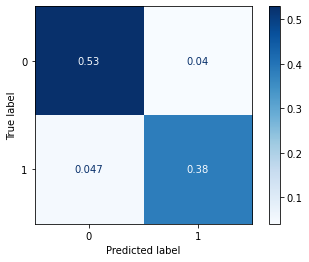

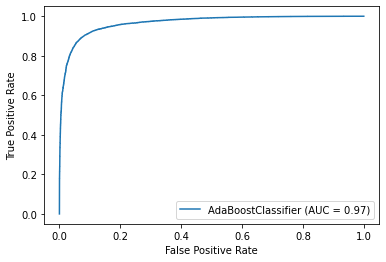

In [38]:
ada_params = {'n_estimators': 1000,
              'random_state': 12345
                }

model_ada = AdaBoostClassifier(**ada_params)
model_ada, accuracy_ada, precision_ada, recall_ada, roc_auc_ada, tt_ada = run_model(model_ada, X_train, y_train, X_test, y_test)

#### Build #2 : Logistic Regression

Accuracy = 0.8267610945815698
Precision = 0.7684772150791568
Recall = 0.8552516304876862
ROC Area under Curve = 0.8302380301077136
Time taken = 0.7601523399353027 s


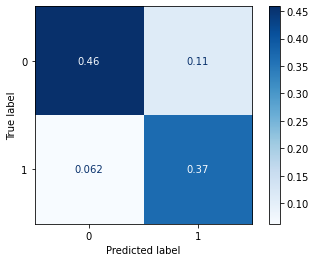

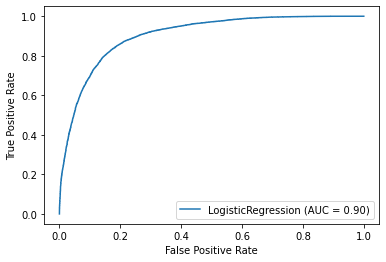

In [39]:
model_lr = LogisticRegression()
model_lr, accuracy_lr, precision_lr, recall_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

#### Build #3 : Random Forest Classifier Algorithm

Accuracy = 0.9527301680425764
Precision = 0.9606124710385816
Recall = 0.9282585418086245
ROC Area under Curve = 0.9497436932737016
Time taken = 22.928075790405273 s


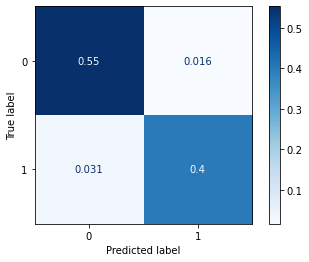

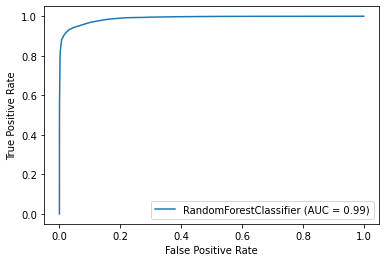

In [40]:
model_rfc = RandomForestClassifier(n_estimators = 300)
model_rfc, accuracy_rfc, precision_rfc, recall_rfc, roc_auc_rfc, tt_rfc = run_model(model_rfc, X_train, y_train, X_test, y_test)

#### Build #4 : Multinomial Naive Bayes Algorithm

Accuracy = 0.6595566357960022
Precision = 0.6244354371742907
Recall = 0.5248710211233331
ROC Area under Curve = 0.6431198372724832
Time taken = 0.043460845947265625 s


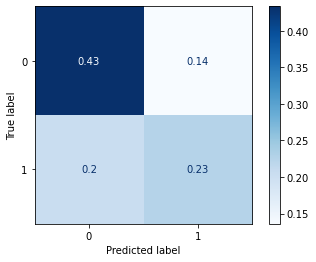

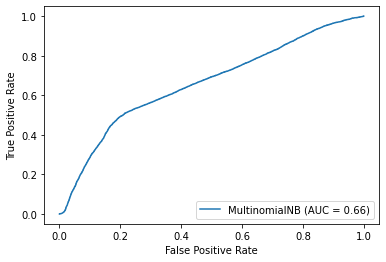

In [41]:
model_mnb = MultinomialNB()
model_mnb, accuracy_mnb, precision_mnb, recall_mnb, roc_auc_mnb, tt_mnb = run_model(model_mnb, X_train, y_train, X_test, y_test)

#### Build #5 : XGBoost Classifier Algorithm

[00:33:24] WARNING: /opt/conda/conda-bld/xgboost-base_1637056499199/work/src/learner.cc:541: 
Parameters: { boosting, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy = 0.9534425679922893
Precision = 0.961608222490931
Recall = 0.92893993964762
ROC Area under Curve = 0.9504523097796599
Time taken = 25.248399019241333 s


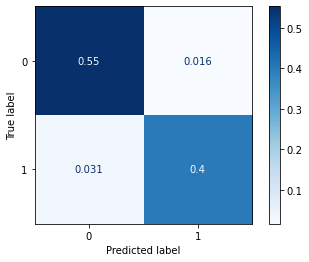

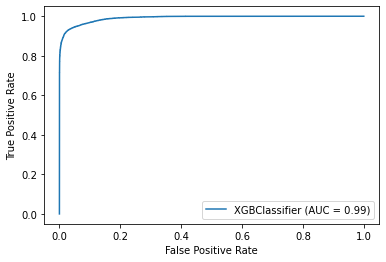

In [42]:
model_xgb = XGBClassifier(boosting='gbdt',
                        metric='multiclass',
                        eval_metric='error')
model_xgb, accuracy_xgb, precision_xgb, recall_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

#### Build #6 : Light Gradient Boosting Machine Classifier

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Accuracy = 0.9415832041235386
Precision = 0.9519495062608164
Recall = 0.9102501703494598
ROC Area under Curve = 0.937759375093788
Time taken = 4.509135007858276 s


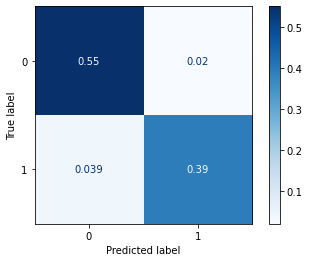

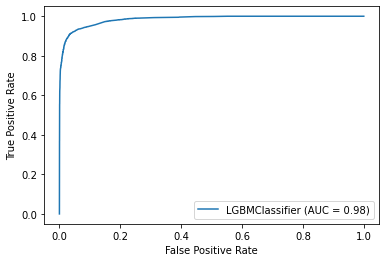

In [43]:
model_lgb = LGBMClassifier(boosting = 'gbdt',
                           num_iterations = 50,
                          learning_rate = 0.05)

model_lgb, accuracy_lgb, precision_lgb, recall_lgb, roc_auc_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

Top Three Performers
- XGB
- AdaBoost
- Logistic Regression

### Model Performance Comparison

In [44]:
# Collecting model data
roc_scores = [roc_auc_lgb, roc_auc_xgb, roc_auc_mnb, roc_auc_rfc, roc_auc_lr, roc_auc_ada]
time_scores = [tt_lgb, tt_xgb, tt_mnb, tt_rfc, tt_lr, tt_ada]

model_data1 = {'Model': ['Light Gradient Boosting Machine', 'Extreme Gradient Boosting', 'Multinomial Naive Bayes', 'Random Forest Classifier', 'Logistic Regression', 'Adaptive Boosting'],
             'ROC AUC Score' : roc_scores,
             'Time Elapsed' : time_scores}

model_data1 = pd.DataFrame(model_data1)

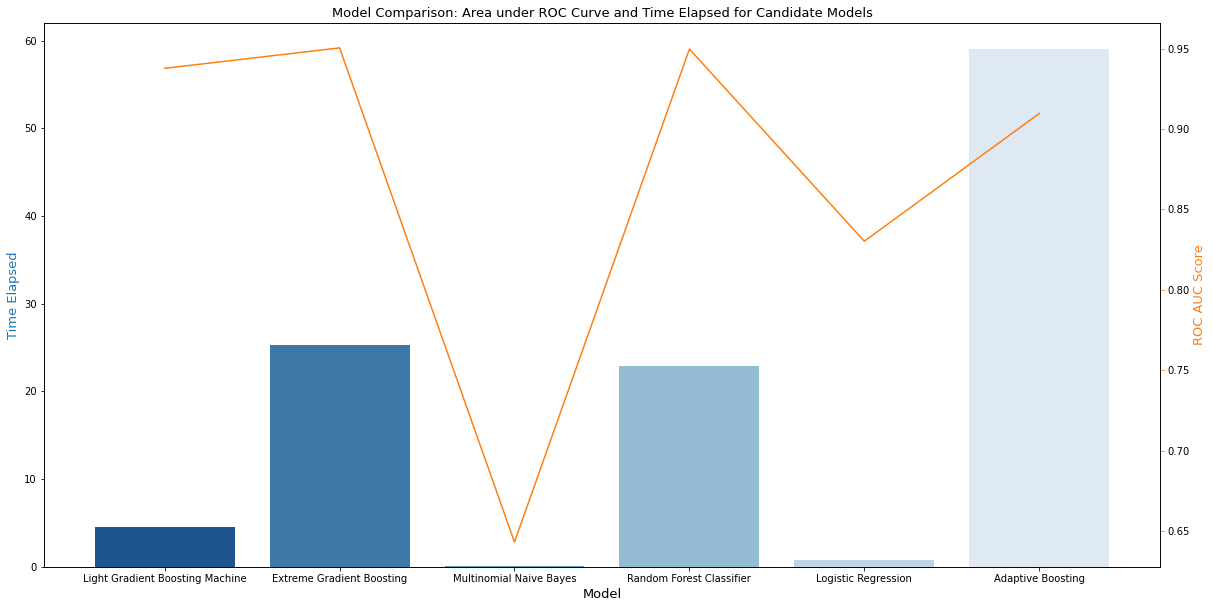

In [45]:
# Plot ROC Score vs Time Elapsed
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('Model Comparison: Area under ROC Curve and Time Elapsed for Candidate Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time Elapsed', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time Elapsed', data = model_data1, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC AUC Score', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC AUC Score', data = model_data1, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [46]:
# Collecting model data
roc_scores = [roc_auc_lgb, roc_auc_xgb, roc_auc_mnb, roc_auc_rfc, roc_auc_lr, roc_auc_ada]
accuracy = [accuracy_lgb, accuracy_xgb, accuracy_mnb, accuracy_rfc, accuracy_lr, accuracy_ada]
precision = [precision_lgb, precision_xgb, precision_mnb, precision_rfc, precision_lr, precision_ada]
recall = [recall_lgb, recall_xgb, recall_mnb, recall_rfc, recall_lr, recall_ada]
time_scores = [tt_lgb, tt_xgb, tt_mnb, tt_rfc, tt_lr, tt_ada]

model_data2 = {'Model': ['Light Gradient Boosting Machine', 'Extreme Gradient Boosting', 'Multinomial Naive Bayes', 'Random Forest Classifier', 'Logistic Regression', 'Adaptive Boosting'],
             'ROC AUC Score' : roc_scores,
             'Accuracy' : accuracy,
              'Precision' : precision,
              'Recall' : recall,
              'Time Elapsed' : time_scores}

model_data2 = pd.DataFrame(model_data2)

In [47]:
model_data2

,Model,ROC AUC Score,Accuracy,Precision,Recall,Time Elapsed
0,Light Gradient Boosting Machine,0.937759,0.941583,0.951950,0.910250,4.509135
1,Extreme Gradient Boosting,0.950452,0.953443,0.961608,0.928940,25.248399
2,Multinomial Naive Bayes,0.643120,0.659557,0.624435,0.524871,0.043461
3,Random Forest Classifier,0.949744,0.952730,0.960612,0.928259,22.928076
4,Logistic Regression,0.830238,0.826761,0.768477,0.855252,0.760152
5,Adaptive Boosting,0.909680,0.912375,0.904649,0.890295,59.031890


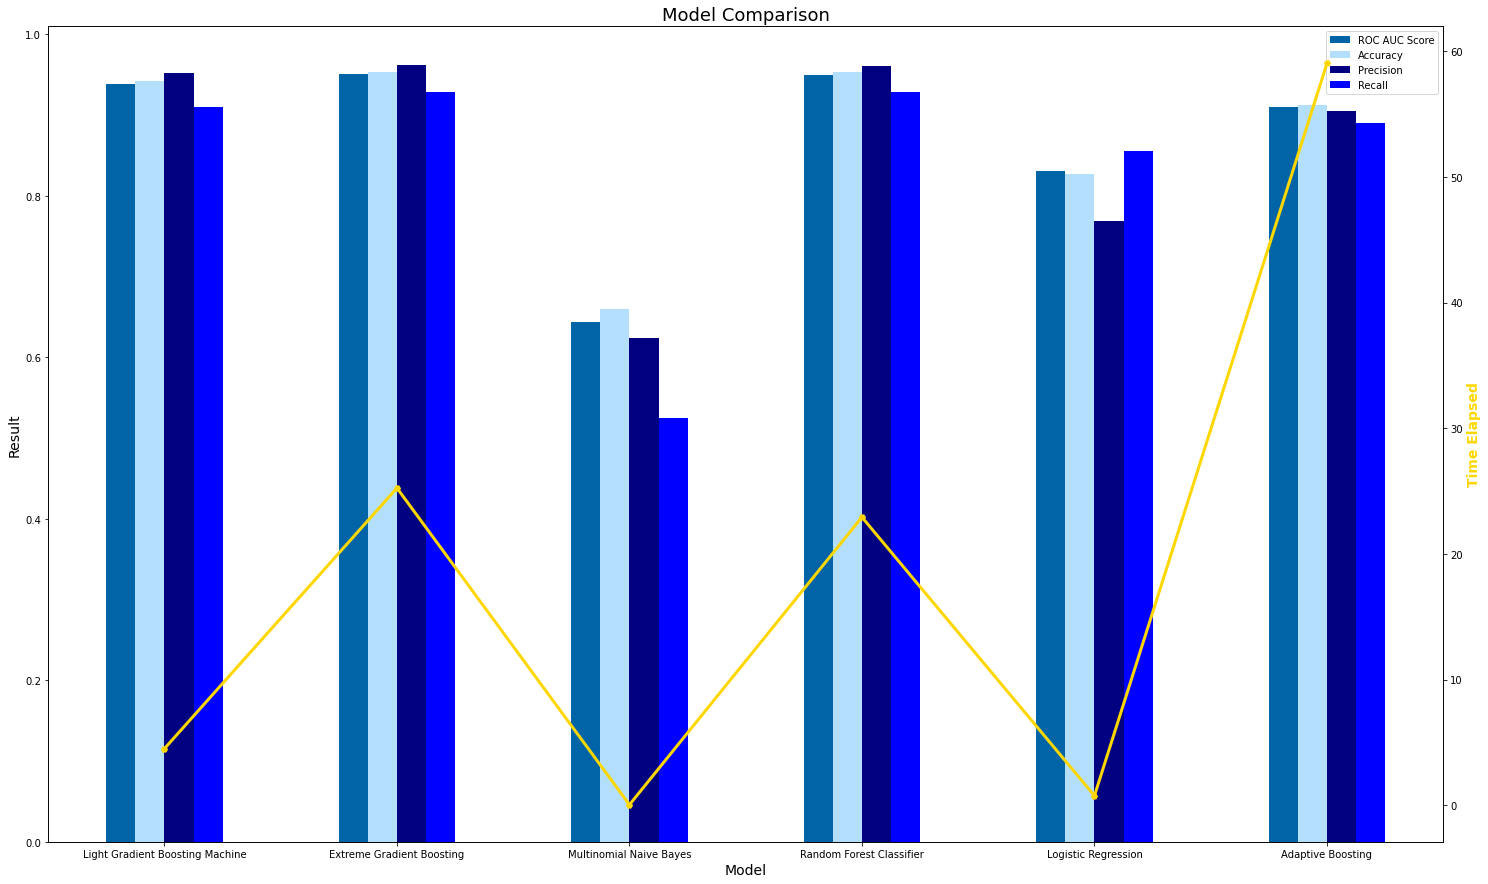

In [48]:
plt.rcParams["figure.figsize"] = (25,15)

ax1 = model_data2.plot.bar(x='Model', y=["ROC AUC Score", "Accuracy", "Precision", "Recall"], color = ['#0064A7', '#B4DFFC', 'navy', 'blue'])
ax2 = model_data2['Time Elapsed'].plot(secondary_y= True, color = 'Gold', linewidth = 3, marker = 'H')
ax1.legend()

ax1.set_title("Model Comparison", fontsize = 18)
ax1.set_xlabel('Model', fontsize=14)
ax2.set_ylabel('Time Elapsed', fontsize=14, color='Gold', fontweight = 'bold')
ax1.set_ylabel('Result', fontsize=14, color='Black');

### Modelling Conclusion

We observe that the Light Gradient Boosting Machine, Extreme Gradient Boosting Machine and Random Forest Classifier are the three most optimal models to run our data on. They achieved the best metrics — which proves they can fit and predict on our data well, and performed the most efficiently — something that is an important consideration if we were to run the model on larger datasets.

Both the Extreme Gradient Boosting algorithm and the Random Forest Classifier algorithm achieved an accuracy of 95% and an ROC AUC of approximately 95%, the Random Forest Classifier completed its run 4 seconds sooner than did the Extreme Gardient Boosting algorithm. While this is a smaller dataset and 4 seconds doesn't seem like much, this could make more of a difference on a larger dataset.

We will run the encoded training dataset through Auto AI next to see how these models perform.